In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Read in the csv
csv_path_akc = "../Data/akc_breed_info.csv"
csv_path_show = "../Data/best_in_show_cleaned.csv"
csv_path_codes = "../Data/breed_codes.csv"
csv_path_intelligence = "../Data/dog_intelligence.csv"

In [29]:
df_akc = pd.read_csv(csv_path_akc)
df_show = pd.read_csv(csv_path_show, encoding='latin-1')
df_codes = pd.read_csv(csv_path_codes)
df_intelligence = pd.read_csv(csv_path_intelligence)

In [4]:
df_akc.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [10]:
df_show.drop(df_show.index[0], inplace=True)

In [4]:
df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.0,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.0,30,0.70,14.00,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.0,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.0,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.0,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [7]:
df_codes.head()

,CODE,BREED DESCRIPTION
0,AFF,AFFENPINSCHER
1,AKI,AKITA
2,MAL,ALASKAN MALAMUTE
3,AW,AMERICAN WIREHAIRD
4,ARG,ARGENTINE DOGO


In [8]:
df_intelligence.head()

,index,Breed,Classification,obey,reps_lower,reps_upper
0,0,Border Collie,Brightest Dogs,95%,1,4
1,1,Poodle,Brightest Dogs,95%,1,4
2,2,German Shepherd,Brightest Dogs,95%,1,4
3,3,Golden Retriever,Brightest Dogs,95%,1,4
4,4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [9]:
df_show.shape

(172, 55)

In [62]:
df_show.columns

Index(['dog_breed', 'category', 'datadog_score', 'popularity_in_us',
       'lifetime_cost_usd', 'intelligence_trainability_ranking',
       'intelligence_trainability_percent', 'longevity_years',
       'longevity_percent', 'num_genetic_ailments', 'genetic_ailments_percent',
       'avg_purchase_price_us', 'avg_purchase_price_us_percent',
       'food_costs_yearly_usd', 'food_costs_yearly_percent',
       'grooming_required', 'grooming_required_percent',
       'suitability_for_children_score', 'suitability_for_children_percent',
       'ultimate top_dog_mega_score_kids',
       'ultimate_top_data_dog_mega_ranking_no_kids',
       'ultimate_top_data_dog_mega_ranking_kids',
       'ultimate_top_dog_mega_score', 'popularity_rating', 'size_category',
       'weight_kg', 'weight_lbs', 'shoulder_height_cm', 'shoulder_height_in',
       'intelligence_category', 'repetitions_new_commands',
       'obey_first_command_percent', 'longevity_sample_size',
       'genetic_diseases_congenital', 'co

In [11]:
#df_show.drop('note', axis=1, inplace=True)

In [63]:
df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.00,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.00,30,0.70,14,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.00,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.00,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.00,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [13]:
#confirming all values are NaN before dropping column
is_nan_series = df_show['POPULARITY_IN_US'].isna()#.all()

# Print the result
print(is_nan_series)

0      False
1      False
2      False
3      False
4      False
       ...  
167    False
168    False
169    False
170    False
171    False
Name: POPULARITY_IN_US, Length: 172, dtype: bool


In [18]:
df_show.drop('POPULARITY IN US.1', axis=1, inplace=True)

In [49]:
df_show.rename(columns={'4a average purchase price, US$': 'avg_purchase_price_us'}, inplace=True)

In [107]:
df_show.to_csv('../Data/best_in_show_cleaned.csv', index=False)

In [82]:
# Count null values in the 'ColumnName' column
null_count = df_show['weight_kg'].isnull().sum()
null_count2 = df_show['weight_lbs'].isnull().sum()

print(f"Number of null values in 'kg': {null_count}")
print(f"Number of null values in 'lbs': {null_count2}")
# will drop first col as is redundant

Number of null values in 'kg': 2
Number of null values in 'lbs': 2


In [83]:
# Check null values in the 'weight_kg' column
null_mask = df_show['weight_kg'].isnull()

# Filter the DataFrame based on the null_mask
rows_with_null = df_show[null_mask]

# Display the DataFrame with rows where 'weight_kg' has null values
print("DataFrame with Null Values in 'weight_kg':")
print(rows_with_null)

DataFrame with Null Values in 'weight_kg':
                                dog_breed category  datadog_score  \
133                      Looked - nothing      NaN            NaN   
143  NOT POSSIBLE IF NO INTELLIGENCE DATA      NaN            NaN   

     POPULARITY_IN_US lifetime_cost_usd intelligence_trainability_ranking  \
133               NaN               NaN                               NaN   
143               NaN               NaN                               NaN   

    Intelligence_trainability_percent longevity_years longevity_percent  \
133                               NaN             NaN               NaN   
143                               NaN             NaN               NaN   

    num_genetic_ailments  ... food_yearly_usd food_lifetime_usd  \
133                  NaN  ...             NaN               NaN   
143                  NaN  ...             NaN               NaN   

    other_costs_total_usd total_yearly_usd total_yearly_gbp  \
133                   NaN 

In [84]:
rows_with_null

,dog_breed,category,datadog_score,POPULARITY_IN_US,lifetime_cost_usd,intelligence_trainability_ranking,Intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
133,Looked - nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NOT POSSIBLE IF NO INTELLIGENCE DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Use .loc to filter rows by index
indices_to_filter = [133]
rows = df_show.loc[indices_to_filter]

In [100]:
rows

,dog_breed,category,datadog_score,POPULARITY_IN_US,lifetime_cost_usd,intelligence_trainability_ranking,Intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
133,Looked - nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Make all column lowercase
df_show.columns = df_show.columns.str.lower()

df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.00,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.00,30,0.70,14,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.00,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.00,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.00,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


In [24]:
#Check what datatypes are we dealing with
df_show.dtypes

dog_breed                                      object
category                                       object
datadog_score                                 float64
popularity_in_us                                int64
lifetime_cost_usd                             float64
intelligence_trainability_ranking              object
intelligence_trainability_percent             float64
longevity_years                               float64
longevity_percent                             float64
num_genetic_ailments                           object
genetic_ailments_percent                      float64
avg_purchase_price_us                          object
avg_purchase_price_us_percent                 float64
food_costs_yearly_usd                         float64
food_costs_yearly_percent                     float64
grooming_required                              object
grooming_required_percent                     float64
suitability_for_children_score                 object
suitability_for_children_per

In [16]:
# How many vars and observations do we have
print(df_show.shape)

(172, 55)


In [69]:
pd.set_option('display.precision', 2)

In [8]:
df_show['avg_purchase_price_usd'].isna().all()

False

In [70]:
# get descriptive statistics on the lifetime costs for different breeds
df_show['lifetime_cost_usd'].describe()

count       94.00
mean     20184.79
std       5169.64
min      12653.00
25%      17778.75
50%      20054.50
75%      21872.00
max      59792.00
Name: lifetime_cost_usd, dtype: float64

In [67]:
df_show['lifetime_cost_usd'] = pd.to_numeric(df_show['lifetime_cost_usd'], errors='coerce').astype(float)

In [31]:
#Save Dataframe working copy
df_show.to_csv('../Data/best_in_show_cleaned.csv', index=False)

From the above I can see I have data cleaning to perform

In [71]:
sorted(list(df_show.columns))

['avg_food_weekly_â£',
 'avg_purchase_price_us',
 'avg_purchase_price_us_percent',
 'avg_purchase_price_usd',
 'category',
 'congenital_ailments_areas_affected',
 'datadog_score',
 'dog_breed',
 'food_costs_yearly_percent',
 'food_costs_yearly_usd',
 'food_lifetime_usd',
 'food_weekly_usd',
 'food_yearly_usd',
 'genetic_ailments_percent',
 'genetic_diseases_congenital',
 'grooming_required',
 'grooming_required_percent',
 'grooming_yearly_gbp',
 'highest_usd',
 'intelligence_category',
 'intelligence_trainability_percent',
 'intelligence_trainability_ranking',
 'lifetime_cost_percent',
 'lifetime_cost_usd',
 'lifetime_cost_usd.1',
 'longevity_percent',
 'longevity_sample_size',
 'longevity_years',
 'lowest_usd',
 'max_gpb',
 'min_gpb',
 'num_genetic_ailments',
 'obey_first_command_percent',
 'other_costs_total_usd',
 'pet_sitters_yearly_gbp',
 'popularity_in_us',
 'popularity_rating',
 'price_category',
 'repetitions_new_commands',
 'shoulder_height_cm',
 'shoulder_height_in',
 'size_c

In [26]:
# Make all column names lowercase
df_show.columns = df_show.columns.str.lower()

### Handling Null Values

In [19]:
filtered_df = df_show[df_show['avg_purchase_price_usd'] == 'no data']
print(filtered_df)

                       dog_breed      category  datadog_score  \
0                  Border Collie       herding           3.64   
1                 Border Terrier       terrier           3.61   
2                       Brittany      sporting           3.54   
3                  Cairn Terrier       terrier           3.53   
4         Welsh Springer Spaniel      sporting           3.34   
..                           ...           ...            ...   
167                   Weimaraner      sporting            NaN   
168                Welsh Terrier       terrier            NaN   
169             Wire Fox Terrier       terrier            NaN   
170  Wirehaired Pointing Griffon      sporting            NaN   
171               Xoloitzcuintli  non-sporting            NaN   

     popularity_in_us  lifetime_cost_usd intelligence_trainability_ranking  \
0                  45            20143.0                                 1   
1                  80            22638.0                       

In [120]:
# find missing data
total = df_show.isnull().sum().sort_values(ascending=False)
percentNulls = (df_show.isnull().sum()/df_show.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentNulls], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
lifetime_cost_percent,85,0.49
food_yearly_usd,85,0.49
ultimate_top_dog_mega_score,85,0.49
ultimate_top_data_dog_mega_ranking_kids,85,0.49
ultimate_top_data_dog_mega_ranking_no_kids,85,0.49
ultimate top_dog_mega_score_kids,85,0.49
suitability_for_children_percent,85,0.49
grooming_required_percent,85,0.49
food_costs_yearly_percent,85,0.49
food_costs_yearly_usd,85,0.49


In [34]:
# View the 'max_gpb' column as a Series
max_gpb = df_show['max_gpb']

# Display the Series
print(max_gpb)

0            4
1            4
2          7.5
3            4
4            4
        ...   
167        7.5
168          4
169    no data
170    no data
171    no data
Name: max_gpb, Length: 172, dtype: object


<Axes: xlabel='lifetime_cost_usd', ylabel='Count'>

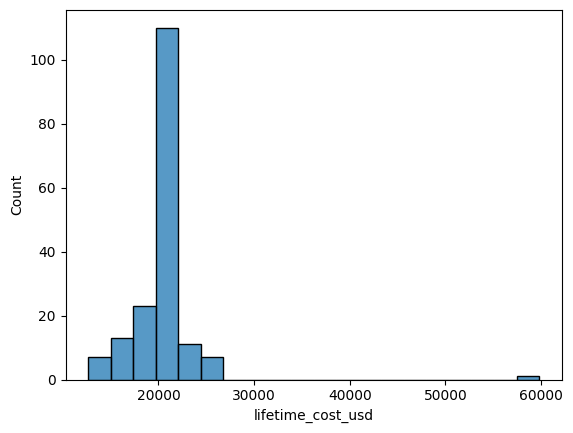

In [80]:
sns.histplot(data=df_show['lifetime_cost_usd'],bins=20)

### Dealing with NULL Values

In [73]:
df_show['lifetime_cost_usd'].describe()

count       94.00
mean     20184.79
std       5169.64
min      12653.00
25%      17778.75
50%      20054.50
75%      21872.00
max      59792.00
Name: lifetime_cost_usd, dtype: float64

As per above descriptive statistics, the median (aka 50th percentile) is 20054.50

In [75]:
# Replace with NaN
df_show['lifetime_cost_usd'].replace('no data', pd.NA, inplace=True)

In [77]:
# Replace NaN with median
df_show['lifetime_cost_usd'].fillna(20054.50, inplace=True)

In [86]:
df_show['longevity_years'].describe()

count    136.00
mean      10.96
std        1.99
min        6.29
25%        9.71
50%       11.28
75%       12.34
max       16.50
Name: longevity_years, dtype: float64

In [85]:
df_show['longevity_years'] = pd.to_numeric(df_show['longevity_years'], errors='coerce')

<Axes: xlabel='longevity_years', ylabel='Count'>

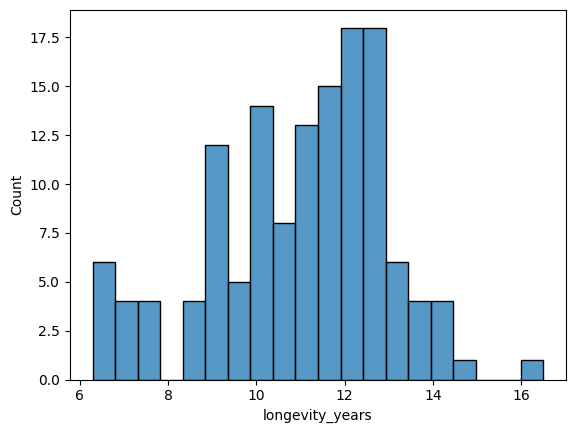

In [94]:
sns.histplot(data=df_show['longevity_years'],bins=20)

In [92]:
#data from AKC website
df_show.loc[df_show['dog_breed'] == 'Black Russian Terrier', 'longevity_years'] = 11.00

In [96]:
average_life_expectancy = df_show['longevity_years'].mean()

In [97]:
print(average_life_expectancy)

10.957372262773722


Instead of using mean of all dogs. I will group the dogs by size and calculate the means by size to fill in the missing data.

In [99]:
# group the dataframe by size & calculate avg for each group
mean_longevity_by_size = df_show.groupby('size_category')['longevity_years'].mean()

# Print the mean longevity for each size category
print(mean_longevity_by_size)

size_category
large      9.73
medium    11.13
small     11.84
Name: longevity_years, dtype: float64


Using a function, pass in argument 'record' that returns mean according to the above calculation, and applies to longevity_years column

In [108]:
def fillna_longevity(record):
    if record['longevity_years'] == 'no data':
        if record['size_category'] == 'small':
            return 11.84
        elif record['size_category'] == 'medium':
            return 11.13
        elif record['size_category'] == 'large':
            return 9.73
        else:
            return record['longevity_years']
    else:
        return record['longevity_years']

df_show['longevity_years'] = df_show.apply(fillna_longevity, axis=1)

In [106]:
# Replace no data with NaN
df_show['longevity_years'].replace('no data', pd.NA, inplace=True)

In [110]:
size_category_mapping = {'small': 11.84, 'medium': 11.13, 'large': 9.73}

# Iterate over rows and update 'longevity_years'
for _, row in df_show.iterrows():
    if pd.isna(row['longevity_years']):
        df_show.at[_, 'longevity_years'] = size_category_mapping.get(row['size_category'], row['longevity_years'])

In [113]:
df_show['longevity_years'].isna().all()

False

Recreate histogram with filled data

<Axes: xlabel='longevity_years', ylabel='Count'>

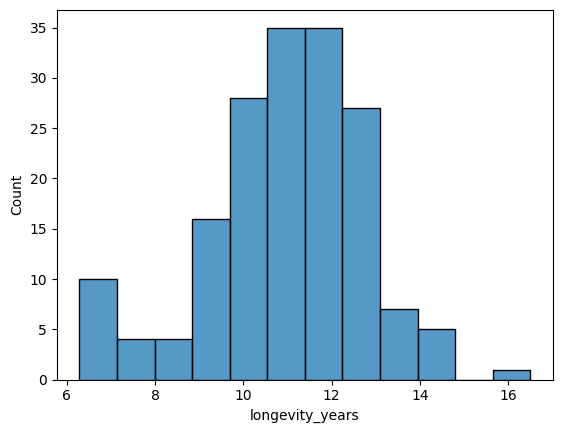

In [117]:
sns.histplot(data=df_show['longevity_years'],bins=12)

In [32]:
df_show['avg_purchase_price_usd'] = pd.to_numeric(df_show['avg_purchase_price_usd'], errors='coerce')

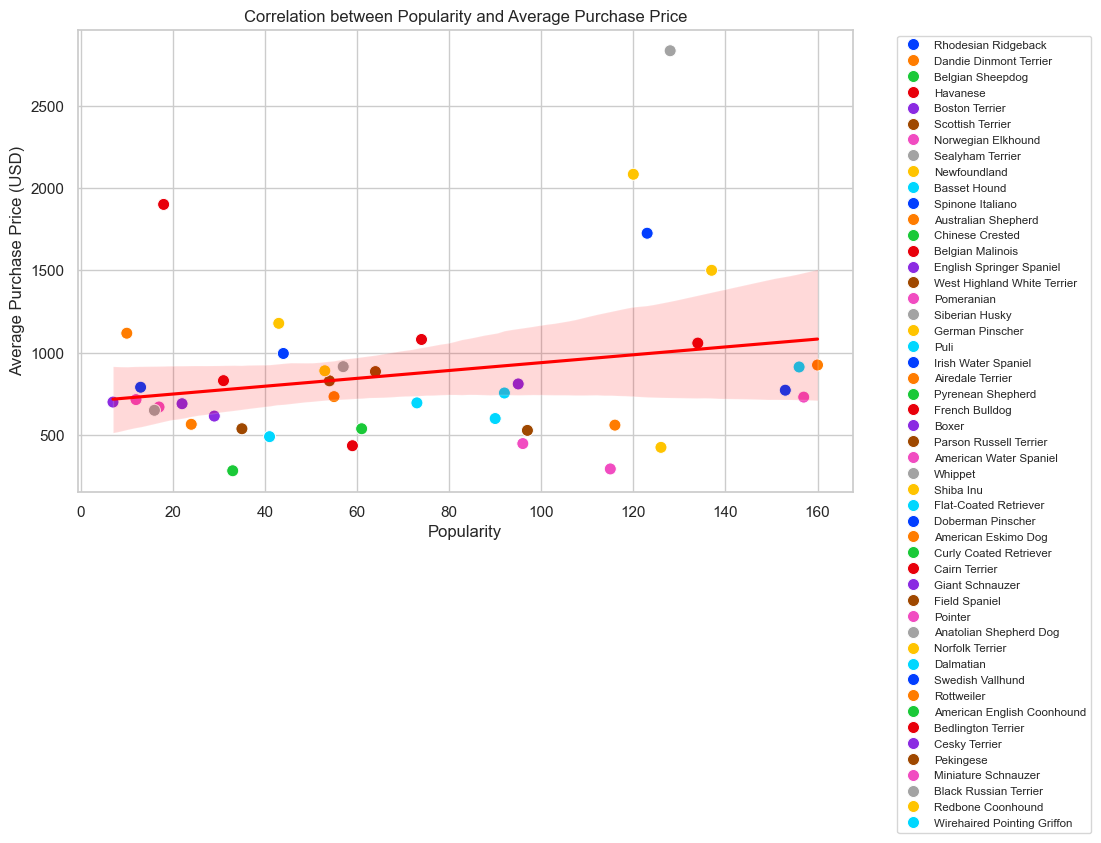

In [51]:
# Style
sns.set(style="whitegrid")

# Sample size of 50 breeds
selected_breeds = df_show.sample(n=50, random_state=23)

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_in_us', y='avg_purchase_price_usd', data=selected_breeds, hue='dog_breed', palette='bright', s=75)

# Add line of best fit
sns.regplot(x='popularity_in_us', y='avg_purchase_price_usd', data=selected_breeds, scatter=False, color='red')

# Set title and labels
plt.title('Correlation between Popularity and Average Purchase Price')
plt.xlabel('Popularity')
plt.ylabel('Average Purchase Price (USD)')

# Move the legend to the upper left
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')

# Show the plot
plt.show()

In [52]:
selected_breeds['popularity_in_us'] = pd.to_numeric(selected_breeds['popularity_in_us'], errors='coerce')
selected_breeds['avg_purchase_price_usd'] = pd.to_numeric(selected_breeds['avg_purchase_price_usd'], errors='coerce')

In [22]:
df_show['weight_lbs'].replace(pd.NA,0.00, inplace=True)

In [23]:
print(df_show['weight_lbs'])

0       NaN
1      13.5
2      35.0
3      14.0
4       NaN
       ... 
167     NaN
168    20.0
169    17.5
170     NaN
171     NaN
Name: weight_lbs, Length: 172, dtype: float64


In [9]:
df_show['weight_lbs'] = pd.to_numeric(df_show['weight_lbs'], errors='coerce').astype(float)

In [12]:
# group the dataframe by size & calculate avg for each group
mean_longevity_by_size = df_show.groupby('size_category')['weight_lbs'].mean()

# Print the mean longevity for each size category
print(mean_longevity_by_size)

size_category
large     90.083333
medium    43.360000
small     17.934211
Name: weight_lbs, dtype: float64


In [ ]:
df_show['weight_lbs']

In [26]:
def fillna_weight(record):
    if record['weight_lbs'] == 0:
        if record['size_category'] == 'small':
            return 17.93
        elif record['size_category'] == 'medium':
            return 43.36
        elif record['size_category'] == 'large':
            return 90.08
        else:
            return record['weight_lbs']
    else:
        return record['weight_lbs']

df_show['weight_lbs'] = df_show.apply(fillna_weight, axis=1)

In [28]:
# Verify the field has been populated with averages
df_show['weight_lbs']

0      43.36
1      13.50
2      35.00
3      14.00
4      43.36
       ...  
167    90.08
168    20.00
169    17.50
170    43.36
171    43.36
Name: weight_lbs, Length: 172, dtype: float64

In [30]:
# Assuming df_show is your DataFrame
df_show.drop("lifetime_cost_usd.1", axis=1, inplace=True)

EDA for Traits Data

In [7]:
csvpath_traits = '../Data/dog_breeds_traits_cleaned.csv'

In [8]:
df_traits = pd.read_csv(csvpath_traits)

In [160]:
df_traits.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,"loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,"loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",16-Dec,Brown,10-Aug,"loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",15-Oct,"Brown, Blue",15-Dec,"intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,"curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"


Perform One-Hot Encoding technique for Character Traits column

In [25]:
print(df_traits.dtypes)

Unnamed: 0                             int64
Breed                                 object
Country of Origin                     object
Fur Color                             object
Height (in)                           object
Color of Eyes                         object
Longevity (yrs)                       object
calm                                   int64
charming                               int64
patient                                int64
kind                                   int64
strong                                 int64
social                                 int64
brave                                  int64
curious                                int64
protective                             int64
trainable                              int64
loyal                                  int64
sensitive                              int64
hypoallergenic                         int64
gentle                                 int64
confident                              int64
intelligen

In [22]:
#Save Dataframe working copy
df_traits.to_csv('../Data/dog_breeds_traits_cleaned.csv', index=True)

In [163]:
df_traits['Character Traits'] = df_traits['Character Traits'].str.lower()

In [164]:
df_traits['Character Traits']

0      loyal, friendly, intelligent, energetic, good-...
1      loyal, intelligent, protective, confident, tra...
2                             loyal, calm, gentle, brave
3      intelligent, active, affectionate, hypoallergenic
4             curious, friendly, energetic, good-natured
                             ...                        
112          intelligent, energetic, good-natured, loyal
113        intelligent, energetic, playful, good-natured
114        intelligent, energetic, playful, good-natured
115          intelligent, energetic, good-natured, loyal
116          intelligent, energetic, good-natured, loyal
Name: Character Traits, Length: 117, dtype: object

In [165]:
# store unique traits
unique_traits_set = set()

# Iterate over the rows and update the set with unique traits
for _, row in df_traits.iterrows():
    traits = row['Character Traits'].split(', ')
    unique_traits_set.update(traits)

# Print the set of unique traits
print(unique_traits_set)

{'calm', 'charming', 'patient', 'kind', 'strong', 'social', 'brave', 'curious', 'protective', 'trainable', 'loyal', 'sensitive', 'hypoallergenic', 'gentle', 'confident', 'intelligent', 'active', 'independent', 'good-natured', 'affectionate', 'friendly', 'energetic', 'athletic', 'playful'}


In [166]:
# Create new fields
for trait in unique_traits_set:
    #trait in brackets below is referring to the new col name we are creating
    df_traits[trait] = df_traits['Character Traits'].apply(lambda x: 1 if trait in x.split(', ') else 0)

Perform One-Hot Encoding technique for Health Problems column

In [13]:
df_traits['Common Health Problems'] = df_traits['Common Health Problems'].str.lower()

In [15]:
# store unique ailments
unique_problems_set = set()

# Iterate over the rows and update the set with unique traits
for _, row in df_traits.iterrows():
    traits = row['Common Health Problems'].split(', ')
    unique_problems_set.update(traits)

# Print the set of unique traits
print(unique_problems_set)

{'cancer', 'eye problems', 'eye issues', 'heart conditions', 'intervertebral disc disease', 'pancreatitis', 'skin allergies', 'epilepsy', 'hereditary myopathy', 'diabetes', 'respiratory issues', 'hip dysplasia', 'bladder stones', 'breathing problems', 'ear infections', 'obesity', 'dental problems', 'elbow dysplasia'}


In [16]:
# Prefix to be added to each new col name
prefix = 'health_'

# Create new fields with the specified prefix
for problem in unique_problems_set:
    # Concatenate the prefix with the trait to form the new column name
    new_column_name = prefix + problem
    
    # Assign values to the new column
    df_traits[new_column_name] = df_traits['Common Health Problems'].apply(lambda x: 1 if problem in x.split(', ') else 0)

In [24]:
df_traits.head()

,Unnamed: 0,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),calm,charming,patient,...,health_hereditary myopathy,health_diabetes,health_respiratory issues,health_hip dysplasia,health_bladder stones,health_breathing problems,health_ear infections,health_obesity,health_dental problems,health_elbow dysplasia
0,0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,Bulldog,England,"White, Red",16-Dec,Brown,10-Aug,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,Poodle,France,"White, Black, Brown, Apricot",15-Oct,"Brown, Blue",15-Dec,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [21]:
# After spot checking a few records to make sure the boolean values are populated correctly. proceeding to drop original column
df_traits.drop('Common Health Problems', axis=1, inplace=True)

# Print the updated DataFrame
df_traits.head()

,Unnamed: 0,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),calm,charming,patient,...,health_hereditary myopathy,health_diabetes,health_respiratory issues,health_hip dysplasia,health_bladder stones,health_breathing problems,health_ear infections,health_obesity,health_dental problems,health_elbow dysplasia
0,0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,Bulldog,England,"White, Red",16-Dec,Brown,10-Aug,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,Poodle,France,"White, Black, Brown, Apricot",15-Oct,"Brown, Blue",15-Dec,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [54]:
import statsmodels.api as sm

# Selecting the variables of interest
X = selected_breeds['popularity_in_us']  # Independent variable
y = selected_breeds['avg_purchase_price_usd']  # Dependent variable

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     avg_purchase_price_usd   R-squared:                         nan
Model:                                OLS   Adj. R-squared:                    nan
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 31 Jan 2024   Prob (F-statistic):                nan
Time:                            23:08:07   Log-Likelihood:                    nan
No. Observations:                      50   AIC:                               nan
Df Residuals:                          48   BIC:                               nan
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
